## 14.1 Errors and Exception Handling

In this section, we will learn about Errors and Exception Handling in Python. You've might have definitely encountered errors by this point in the course. For example:

In [ ]:
print('Hello)

SyntaxError: EOL while scanning string literal (<ipython-input-1-db8c9988558c>, line 1)

Note how we get a SyntaxError, with the further description that it was an End of Line Error (EOL) while scanning the string literal. This is specific enough for us to see that we forgot a single quote at the end of the line. Understanding of these various error types will help you debug your code much faster. 

This type of error and description is known as an Exception. Even if a statement or expression is syntactically correct, it may cause an error when an attempt is made to execute it. Errors detected during execution are called exceptions and are not unconditionally fatal.

| Exception | description   |
|------|------|
|   Exception  | Base class of exception. Allother exception derived from this class.|
|   ArithmeticError  | Base class for those exceptions that are raised for arithmetic or numeric errors.|
|   ZeroDivisionError  | Raised when division or modulo operation is zero|
|   ModuleNotFoundError  | Raised by import when imported module could not be located|
|   KeyError  | Raised when a mapping (dictionary) key is not found in keys of a dictionary.|
|   MemoryError  | Raised when an operation runs out of memory|

You can check out the full list of built-in exceptions [here](https://docs.python.org/3.8/library/exceptions.html). Now, let's learn how to handle errors and exceptions in our own code.

In python, There are two popular saying for code styles:-

1) LBYL

2) EAFP

### LBYL

Look before you leap. 
This coding style explicitly tests for pre-conditions before making calls or lookups. This style contrasts with the EAFP approach and is characterized by the presence of many if statements.

In a multi-threaded environment, the LBYL approach can risk introducing a race condition between “the looking” and “the leaping”. For example, the code, if key in mapping: return mapping[key] can fail if another thread removes key from mapping after the test, but before the lookup. This issue can be solved with locks or by using the EAFP approach.

For this, you can refer in python documentation:-
>** https://docs.python.org/3/glossary.html **

In a simple language, we first check what we are going to do. For example, if we want to check if a file is available before trying to write:

```python
 if filename:
     with open()..
     ....
```

### EAFP

Easier to ask for forgiveness than permission. 

This common Python coding style assumes the existence of valid keys or attributes and catches exceptions if the assumption proves false. This clean and fast style is characterized by the presence of many try and except statements. The technique contrasts with the LBYL style common to many other languages such as C. 

In a simple language,EAFP is like we first write our code so that it performs and executes first, and then we will take care of the consequences if it doesn't work. That means we try running some code, expecting it to work, but if it failes then will handle it in exception in except block.

```python
try:
     with open(filename,'r').. # First executes
     ....
 except:
     # handling exception
```

## 14.2 try and except

The basic terminology and syntax used to handle errors in Python is the **try** and **except** statements. The code which can cause an exception to occur is put in the *try* block and the handling of the exception are the implemented in the *except* block of code. The syntax form is:

    try:
       You do your operations here...
       ...
    except ExceptionI:
       If there is ExceptionI, then execute this block.
    except ExceptionII:
       If there is ExceptionII, then execute this block.
       ...
    else:
       If there is no exception then execute this block. 


Using just except, we can check for any exception: To understand better let's check out a sample code that opens and writes a file:

In [ ]:
try:
    f = open('demo_file','w')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception and then execute this print statement
   print("Error: Could not find file or read data")
else: # this else block will execute if try block does not raise an exception
   print("Content written successfully")
   f.close()

Content written successfully


Now, let's see what happens when we don't have write permission? (opening only with 'r'):

In [ ]:
f = open('demo_file','r')
f.write('Test write this')
print("fsfsfsfsf")

UnsupportedOperation: not writable

In [ ]:
try:
    f = open('demo_file','r')
    f.write('Test write this')
except IOError:
    # This will only check for an IOError exception and then execute this print statement
   print("Error: Could not find file or read data")
else:
   print("Content written successfully")
   f.close()

Error: Could not find file or read data


Notice, how we only printed a statement! The code still ran and we were able to continue doing actions and running code blocks. This is extremely useful when you have to account for possible input errors in your code. You can be prepared for the error and keep running code, instead of your code just breaking as we saw above.

We could have also just said except: if we weren't sure what exception would occur. For example:

In [ ]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except:
    # This will check for any exception and then execute this print statement
   print("Error: Could not find file or read data")
else:
   print("Content written successfully")
   f.close()

Error: Could not find file or read data


Now, we don't actually need to memorize the list of exception types! Now what if we keep wanting to run code after the exception occurred? This is where **finally** comes in.
### finally
The finally: Block of code will always be run regardless if there was an exception in the try code block. The syntax is:

    try:
       Code block here
       ...
       Due to any exception, this code may be skipped!
    finally:
       This code block would always be executed.

For example:

In [ ]:
try:
   f = open("testfile", "w")
   f.write("Test write statement")
finally:
   print("Always execute finally code blocks")

Always execute finally code blocks


We can use this in conjunction with except. Let's see a new example that will take into account a user putting in the wrong input:

In [ ]:
def askint():
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            
        finally:
            print("Finally, I executed!")
        print(val)       

In [ ]:
askint()

Please enter an integer: 66
Finally, I executed!
66


In [ ]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

Check how we got an error when trying to print val (because it was properly assigned). Let's find the right solution by asking the user and checking to make sure the input type is an integer:

In [ ]:
def askint():
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            try:
                val = int(input("Try again-Please enter an integer: "))
            except:
                print("handle it ")
        finally:
            print("Finally, I executed!")

In [ ]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Try again-Please enter an integer: 44
Finally, I executed!


Hmmm...that only did one check. How can we continually keep checking? We can use a while loop!

In [ ]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            break
        else:
            print('Yep thats an integer!')
            break
        finally:
            print("Finally, I executed!")
            print(val) 

In [ ]:
askint()

Please enter an integer: five
Looks like you did not enter an integer!
Finally, I executed!


UnboundLocalError: local variable 'val' referenced before assignment

### Raising an exception

We can raise an excepton by using raise statement. Let us check with examples:-

In [ ]:
def raise_exc(a):
    if a < 5:
        raise Exception(a) # If exception raised code below to this will not execute
        
    return a

try:
    res1 = raise_exc(7)
    print(res1)
    res = raise_exc(2)
    print(res)
except Exception as e:
    print("Error is ", e)

7
Error is  2


### User defined exception

Developers can create their own exceptions by creating a new exception which will be derived from the Exception class.The newly created exception nae should be ended with “Error” similar to naming of the standard exceptions in python.

In [ ]:
''' Create user-defined exception 
    MyError is derived from super class Exception 
'''
class NewError(Exception): 
  
    # Constructor or Initializer 
    def __init__(self, val): 
        self.val = val 
  
    # __str__ is to print() the value 
    def __str__(self): 
        return(repr(self.val)) 
  
try: 
    raise(NewError(5)) 
except NewError as e: 
    print('A New Exception occured: ',e.val) 

A New Exception occured:  5


### Assertion

Python's assert statement helps you find bugs more quickly and with less pain.

Assertions are a systematic way to check that the internal state of a program is as the programmer expected, with the goal of catching bugs. In particular, they're good for catching false assumptions that were made while writing the code, or abuse of an interface by another programmer. In addition, they can act as in-line documentation to some extent, by making the programmer's assumptions obvious. ("Explicit is better than implicit.")

For more,
>**Refer:-** https://wiki.python.org/moin/UsingAssertionsEffectively

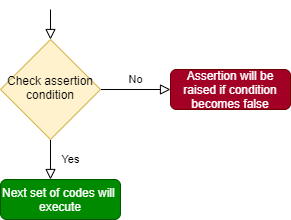

In [ ]:
from IPython.display import Image
Image(filename='img/assertion.png')

In [ ]:
# Assert for comparing two variables
try: 
    x = 1
    y = 1
    assert x != y, "Both variables are not the same"
    print(x , y) 
  
# the error message we provided gets printed  
except AssertionError as msg:  
    print(msg) 

Both variables are not the same


In [ ]:
# Looping through list and print division of given element with the element itself if element is int else raise exception

list1 = ['a', 0, 2] # For str 'a' raise error, for 0 raise zero division error

for el in list1:
    try:
        print("The element is", el)
        res = int(el)/int(el)
        break
    except Exception as e:
        print("Oo!", e, "occurred.")
        print("Next check for another element in a list.")
        print()
print(res)

The element is a
Oo! invalid literal for int() with base 10: 'a' occurred.
Next check for another element in a list.

The element is 0
Oo! division by zero occurred.
Next check for another element in a list.

The element is 2
1.0


In [ ]:
# try with if condition if not positive number it will raise an exception using raise
try:
    a = int(input("Enter a positive integer: "))
    if a <= 0:
        raise ValueError("That is not a positive number!")
except ValueError as ve:
    print(ve)

Enter a positive integer: -8
That is not a positive number!


In [ ]:
# Simple program for even number using try else and assert 
try:
    num = int(input("Enter a number: "))
    assert num % 2 == 0
except:
    print("Not an even number!")
else:
    print("Executing else block as try block hasn't raise an exception.")

Enter a number: 32
Executing else block as try block hasn't raise an exception.


In [ ]:
# Defining function for raising exception
def raise_exception(ex):
    raise ex

In [ ]:
# Use of lambad function with exception raise if value < 10 will raise an exception
y = lambda x: 2*x if x < 10 else raise_exception(Exception('Value is greater than 10'))

In [ ]:
y(5)

10

In [ ]:
y(20)

Exception: Value is greater than 10

In [ ]:
# defining function for finding sqrt and checking type of number and raise exception if not an int/float
import math
def find_sqrt(a):
    if not isinstance(a,(int,float)):
        raise TypeError("a must be numeric")
    elif a < 0:
        raise TypeError("a should not be negative")
    else:
        print(math.sqrt(a))

In [ ]:
find_sqrt("scsc")

TypeError: a must be numeric

In [ ]:
find_sqrt(-56)

TypeError: a should not be negative

In [ ]:
find_sqrt(6)

2.449489742783178
